In [1]:
#Import packages
import pandas as pd
import numpy as np
import scipy
import warnings
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.metrics import r2_score

In [2]:
#Read the data file
df = pd.read_csv('Association binding data.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,T,2e-3nM,2e-2nM,2e-1nM,2nM,2e1nM,2e2nM,2e3nM
0,0.03999,0.54110,-0.07351,0.49598,0.19276,0.54773,0.09752,-0.14705
1,0.13999,-0.17528,-0.42351,-0.13056,0.32326,0.05323,0.96236,-0.10489
2,0.23999,-0.14099,-0.11648,-0.02362,0.19115,-0.00857,0.66392,18.24355
3,0.34000,-0.39408,0.33508,-0.11577,0.02476,-0.16245,1.08736,23.67714
4,0.44000,-0.18473,-0.08055,-0.21501,-0.11822,0.15628,1.68188,25.60450
...,...,...,...,...,...,...,...,...
2402,240.24000,-0.16283,0.24290,3.70689,24.65600,57.20860,75.17100,93.87480
2403,240.34000,-0.10345,-0.09070,3.80377,24.84980,57.25010,75.59910,93.61030
2404,240.44000,0.00514,0.01711,3.71627,24.67160,57.17120,75.82950,93.81820
2405,240.54000,-0.03549,0.15462,3.85845,24.76620,56.88990,75.88110,93.88060


In [3]:
def func(x, bmax_1, kon_1, bmax_2, kon_2, bmax_3, kon_3, conc, koff_1, koff_2, koff_3):
    kob_1 = kon_1*conc + koff_1
    kob_2 = kon_2*conc + koff_2
    kob_3 = kon_3*conc + koff_3
    return bmax_1*(1-np.exp(-kob_1*x)) + bmax_2*(1-np.exp(-kob_2*x)) + bmax_3*(1-np.exp(-kob_3*x))

In [4]:
conc = input('Concentration(M): ')
koff_1 = input('koff_1: ')
koff_2 = input('koff_2: ')
koff_3 = input('koff_3: ')

Concentration(M): 2E-9
koff_1: 1.9814580006436189
koff_2: 0.0001283299841317005
koff_3: 1.9336632505437739


In [5]:
conc = float(conc)
koff_1 = float(koff_1)
koff_2 = float(koff_2)
koff_3 = float(koff_3)

In [6]:
column = input('Column of data to fit: ')

Column of data to fit: 2nM


In [7]:
xData = np.array(df.loc[:, 'T'])
yData = np.array(df.loc[:, column])

In [8]:
parameters, pcov = curve_fit(lambda x, bmax_1, kon_1, bmax_2, kon_2, bmax_3, kon_3: func(x, bmax_1, kon_1, bmax_2, kon_2, bmax_3, kon_3, conc, koff_1, koff_2, koff_3), xData, yData, method = 'dogbox')
parameters

array([ 1.92696779e+03, -2.40035106e+07,  3.61965636e+01,  2.33300989e+06,
       -1.92698843e+03,  1.00000000e+00])

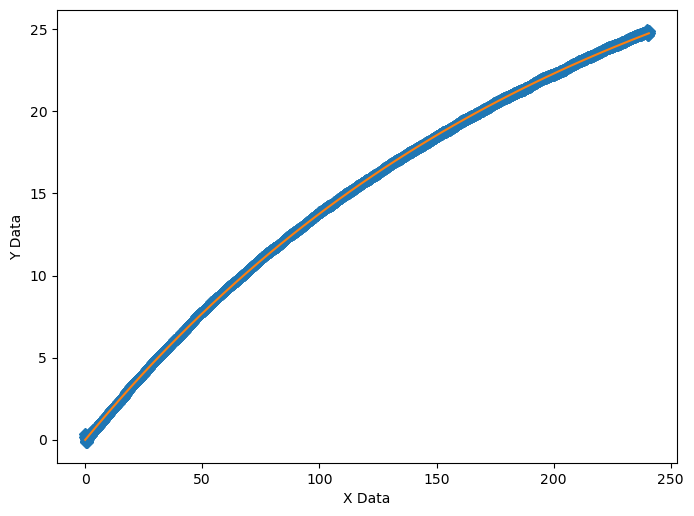

kon_1: -24003510.626793433
kon_2: 2333009.887360772
kon_3: 1.0


In [9]:
graphWidth = 800
graphHeight = 600
f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
axes = f.add_subplot(111)
axes.plot(xData, yData,  'D')
xModel = np.linspace(min(xData), max(xData))
yModel = func(xModel, parameters[0], parameters[1], parameters[2], parameters[3], parameters[4], parameters[5], conc, koff_1, koff_2, koff_3)
axes.plot(xModel, yModel)  
axes.set_xlabel('X Data') # X axis data label
axes.set_ylabel('Y Data') # Y axis data label
plt.show()
plt.close('all') # clean up after using pyplot
print('kon_1:', parameters[1])
print('kon_2:', parameters[3])
print('kon_3:', parameters[5])